In [2]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from scipy import integrate, interpolate  
from scipy.stats import gengamma, laplace, norm
from scipy.stats import kstwobign, kstest, ks_1samp, anderson, anderson_ksamp, cramervonmises, kstwo, ksone
from scipy.special import kolmogorov
import matplotlib.pyplot as plt
from utilities import *
%matplotlib inline
import pickle
from ipywidgets import interactive

np.random.seed(42)

Text(0.5, 1.0, '(r, eta) pairs for which CDFS are computed')

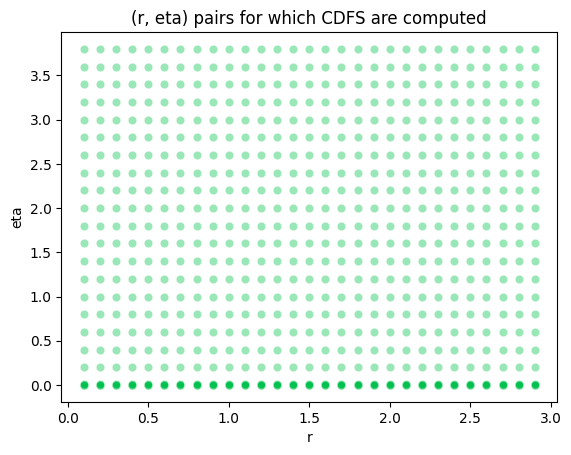

In [3]:
with open('updated_100000.pickle', 'rb') as handle:
    all_cdfs = pickle.load(handle)
all_keys = np.array(list(all_cdfs.keys()))
all_cdfs_df = pd.DataFrame(all_cdfs.items())
all_cdfs_df['r'] = pd.Series(all_cdfs_df[0])
all_cdfs_df['eta'] = pd.Series(all_cdfs_df[0])
sns.scatterplot(x = all_keys.T[0], y = all_keys.T[1], color = 'xkcd:shamrock green', alpha = 0.4)
plt.xlabel('r')
plt.ylabel('eta')
plt.title('(r, eta) pairs for which CDFS are computed')

0.36900000000000027

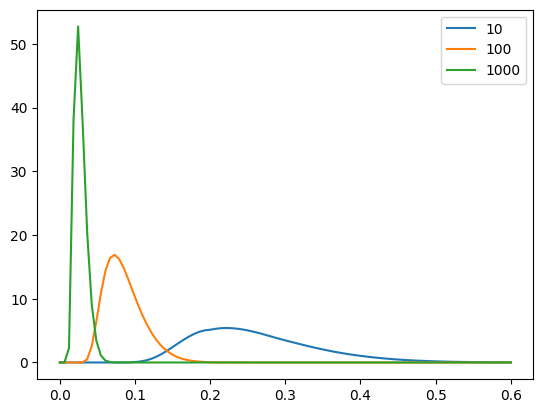

In [4]:
xs = np.linspace(0, 0.6, 100)
plt.plot(xs, kstwo(n=10).pdf(xs), label = '10')
plt.plot(xs, kstwo(n=100).pdf(xs), label = '100')
plt.plot(xs, kstwo(n=1000).pdf(xs), label = '1000')
plt.legend()
kstwo(n=10).isf(1 - kstwo(n=10).cdf(0.369))

## Power

In [58]:
all_cdfs.keys()

dict_keys([(0.1, 0), (0.1, 0.2), (0.1, 0.4), (0.1, 0.6), (0.1, 0.8), (0.1, 1.0), (0.1, 1.2), (0.1, 1.4), (0.1, 1.6), (0.1, 1.8), (0.1, 2.0), (0.1, 2.2), (0.1, 2.4), (0.1, 2.6), (0.1, 2.8), (0.1, 3.0), (0.1, 3.2), (0.1, 3.4), (0.1, 3.6), (0.1, 3.8), (0.1, 1e-09), (0.1, 1e-08), (0.1, 1e-07), (0.1, 1e-06), (0.1, 1e-05), (0.1, 0.0001), (0.1, 0.001), (0.1, 0.01), (0.2, 0), (0.2, 0.2), (0.2, 0.4), (0.2, 0.6), (0.2, 0.8), (0.2, 1.0), (0.2, 1.2), (0.2, 1.4), (0.2, 1.6), (0.2, 1.8), (0.2, 2.0), (0.2, 2.2), (0.2, 2.4), (0.2, 2.6), (0.2, 2.8), (0.2, 3.0), (0.2, 3.2), (0.2, 3.4), (0.2, 3.6), (0.2, 3.8), (0.2, 1e-09), (0.2, 1e-08), (0.2, 1e-07), (0.2, 1e-06), (0.2, 1e-05), (0.2, 0.0001), (0.2, 0.001), (0.2, 0.01), (0.3, 0), (0.3, 0.2), (0.3, 0.4), (0.3, 0.6), (0.3, 0.8), (0.3, 1.0), (0.3, 1.2), (0.3, 1.4), (0.3, 1.6), (0.3, 1.8), (0.3, 2.0), (0.3, 2.2), (0.3, 2.4), (0.3, 2.6), (0.3, 2.8), (0.3, 3.0), (0.3, 3.2), (0.3, 3.4), (0.3, 3.6), (0.3, 3.8), (0.3, 1e-09), (0.3, 1e-08), (0.3, 1e-07), (0.3, 1e-

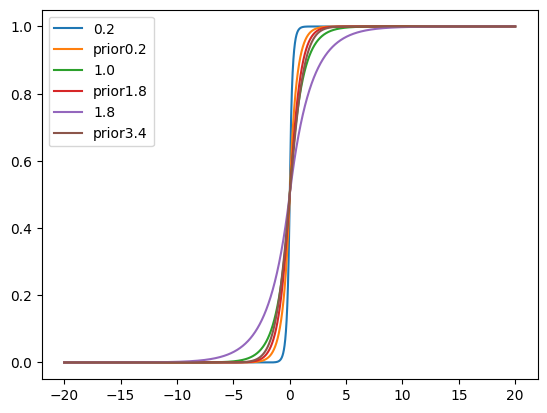

In [84]:
xs = np.linspace(-20, 20, 10000)
laplace_scales = np.arange(0.2, 2, 0.8)#np.array([0.01, 0.1, 0.5, 1, 1.1, 1.5, 4, 6])
prior_scales = np.arange(0.2, 4, 1.6)
for ls, gs in zip(laplace_scales, prior_scales):
    ls = round_to_2_sigfigs(ls)
    gs = round_to_2_sigfigs(gs)

    plt.plot(xs, laplace.cdf(xs, scale = ls), label = ls)
    plt.plot(xs, all_cdfs[(2.9, gs)](xs), label = 'prior'+str(gs))
plt.legend();

-1


0.13525845442118056

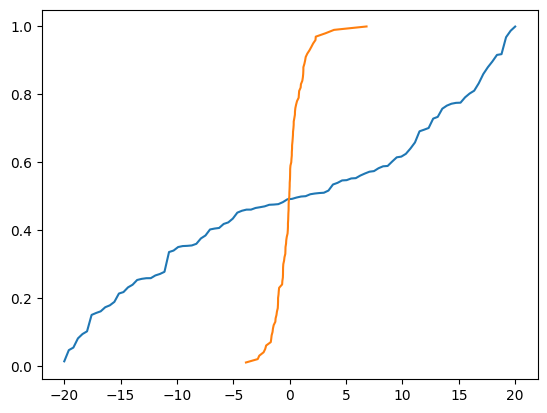

In [39]:
n = 100
xs = np.linspace(-20, 20, n)
laplace_vals = sorted(laplace.rvs(loc=0, scale = 1, size = n))
gamma_vals = compute_prior_cdf(2.5, 8)(laplace_vals)
plt.plot(xs, gamma_vals)
plt.plot(laplace_vals, np.arange(1, n+1)/n)
np.max(np.abs(gamma_vals - np.arange(1, n+1)/n))

In [43]:
ks_1samp(laplace.rvs(scale=1.2, size = 10000), cdf=compute_prior_cdf(1.2, 0.1))

-1


KstestResult(statistic=0.06201102142995579, pvalue=7.15758002151405e-34, statistic_location=-0.5376031565433844, statistic_sign=1)

In [41]:
cramervonmises(sample_laplace(1000), cdf=compute_prior_cdf(1.2, 0.01))

-1


CramerVonMisesResult(statistic=0.8616965516434497, pvalue=0.005202908548433305)

In [ ]:
%%time
# Assuming I had both true distributions, but was using Kolmorogov with n samples
xs = np.linspace(-50, 50, 10000)
all_keys = list(all_cdfs.keys())[::4]
laplace_scales = 
samples_range = np.arange(1,5)
num_samples = 10**samples_range
num_samples_names = list(num_samples)
all_dist_df_s = pd.DataFrame(columns = ['base_r', 'base_eta', 'laplace_scale', 'distance'] + num_samples_names)
# with open('all_dist_df.pickle', 'rb') as handle:
#     all_dist_df_s = pickle.load(handle)
done = set()

for i, (base_r, base_eta) in enumerate(all_keys):
    base_cdf = all_cdfs[(base_r, base_eta)](xs)
    for j, (r, eta) in enumerate(laplace_scales):
        row = (min(base_r, r), min(base_eta, eta), max(base_r, r), max(base_eta, eta))
        if row not in done:

            cdfvals = all_cdfs[(base_r, base_eta)](sorted(sample_prior(r, eta, n)))
            distance = np.max(np.abs(cdfvals - np.arange(1, n+1)/n))
            pvals = [ksone(n=i).sf(distance) for i in num_samples]
            all_dist_df_s.loc[i*len(all_cdfs)+j, :] = [base_r, base_eta, r, eta, distance] + pvals
            all_dist_df_s.loc[i*len(all_cdfs)+j, :] = [r, eta, base_r, base_eta, distance] + pvals
            done.add((min(base_r, r), min(base_eta, eta), max(base_r, r), max(base_eta, eta)))
print(all_dist_df_s.shape)
all_dist_df_s.head()
with open(f'all_dist_df_sample_prior.pickle', 'wb') as handle:
    pickle.dump(all_dist_df_s, handle, protocol=pickle.HIGHEST_PROTOCOL) 